In [1]:
print(__doc__)

%matplotlib inline
# Code source: Jaques Grobler
# License: BSD 3 clause


import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

Automatically created module for IPython interactive environment


In [2]:
traindata_X = [[10],[12],[20],[25],[18],[32],[40],[42]]
traindata_y =[5,7.2,7,8,10,11,15,26]
testdata_X = [[28],[60],[38]]
testdata_y = [9,25,14]

Coefficients: 
 [0.46712744]
Intercept: 
 -0.46979507699769485
Mean squared error: 10.11


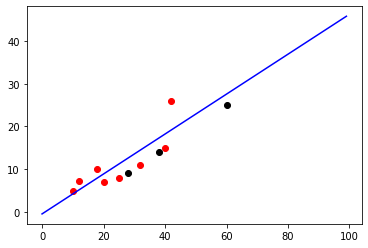

In [3]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(traindata_X, traindata_y)

# Make predictions using the testing set
testdata_y_pred = regr.predict(testdata_X)

# The coefficients
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(testdata_y, testdata_y_pred))


# Plot outputs
plt.scatter(traindata_X, traindata_y,  color='red')
plt.scatter(testdata_X, testdata_y,  color='black')

list_x=[]
list_y=[]
for x in range(0,100):
    y = regr.coef_ * x + regr.intercept_
    list_x.append(x)
    list_y.append(y)
plt.plot(list_x, list_y, color='blue')  

#plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')

#plt.plot(testdata_X, testdata_y_pred, color='blue', linewidth=3)

#plt.xticks(())
#plt.yticks(())

plt.show()

In [4]:
from sklearn.preprocessing import PolynomialFeatures

In [11]:
polynomial_features= PolynomialFeatures(degree=4)
x_poly = polynomial_features.fit_transform(traindata_X)
testdata_x_poly = polynomial_features.fit_transform(testdata_X)

In [12]:
print(testdata_x_poly)

[[1.000000e+00 2.800000e+01 7.840000e+02 2.195200e+04 6.146560e+05]
 [1.000000e+00 6.000000e+01 3.600000e+03 2.160000e+05 1.296000e+07]
 [1.000000e+00 3.800000e+01 1.444000e+03 5.487200e+04 2.085136e+06]]


In [13]:
model = linear_model.LinearRegression()
model.fit(x_poly, traindata_y)

testdata_y_poly_pred = model.predict(testdata_x_poly)

In [14]:
print(testdata_y_poly_pred)

[  8.76887536 272.3124462   13.60601747]


In [15]:
print(model.coef_)
print(model.intercept_)

[ 0.00000000e+00 -3.32172393e+00  3.09099262e-01 -1.08423050e-02
  1.29874293e-04]
17.625590794981512


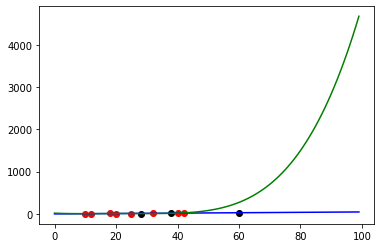

In [19]:
list_poly_x=[]
list_poly_y=[]
for x in range(0,100):
    y = model.coef_[4] * x**4 + model.coef_[3] * x**3+model.coef_[2] * x*x+model.coef_[1] * x   + model.intercept_
    list_poly_x.append(x)
    list_poly_y.append(y)

    
for x in range(0,100):
    y = regr.coef_ * x + regr.intercept_
    list_x.append(x)
    list_y.append(y)
    
plt.plot(list_x, list_y, color='blue')      
plt.scatter(traindata_X, traindata_y,  color='red')
plt.scatter(testdata_X, testdata_y,  color='black')
plt.plot(list_poly_x, list_poly_y, color='green')  


In [20]:
print('Mean squared error of line model: %.2f'
      % mean_squared_error(testdata_y, testdata_y_pred))
print('Mean squared error of second order polynomial model: %.2f'
      % mean_squared_error(testdata_y, testdata_y_poly_pred))

Mean squared error of line model: 10.11
Mean squared error of second order polynomial model: 20387.88
